# Introduction

In this project, we used Supervised Learning to train an agent to complete a simplified version of our assigment in Project 1 of this class: the game Exactly One Mazes.

This agent will be trained in order for it to learn how to win the game.

The objective of the game is to have the player cross from the bottom-left to the top right square, without crossing the same L shape more than one time. The player also must not navigate sections of the board he has already visited.

The Player can move in any direction, as long as the square he is in does not belong to an already visited L shape.

# Required Libraries and Tools

● OpenAI Gym - A framework that acts as a playground for testing agents, using
controlled environments;

● Numpy - A library for processing data in arrays;

● Matplotlib and Seaborn - Data visualization libraries to draw plots and charts;

● Jupyter Notebooks - Interactive computing and development.

# Algorithms employed

To teach the agent, the following algorithms were implemented:

● Q-Learning - State–action–reward–state;

● SARSA - State–action–reward–state–action.

# Model

In this notebook, we are using a 4x4 board used with three L shapes, with them close enough to be easy to visualize a path.

The rewards were distributed in such a way that the algorithm was severely punished for every bad move:

● If visiting an already visited cell, -50 points

● If visiting an L shape for the second time, -50 points

● If it reached the end without visiting all L shapes, -50 points

● If landing in a neutral (0) cell, -0.75 points

● This was made so the algorithm would reach the end as fast as possible

● If visiting a newly discovered L shape, +10 points

● If it reached the end and visited all L shapes, +10 points


# Hyperparameters

● Learning rate: 0.5

● Discount factor: 0.6

● Epsilon: 0.1 and 0.01 decay rate

● Total training episodes: 500 with 100 steps maximum


## Game board

In [32]:
from new_env import TakeTheLEnv


env = TakeTheLEnv()
env.reset()
env.render()


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



## Defining hyperparameters

In [33]:
import numpy as np

qtable = np.zeros((env.observation_space.n, env.action_space.n))

total_episodes = 500  # the total number of episodes to run
max_steps = 100  # the maximum number of steps per episode

learning_rate = 0.5  # the learning rate

gamma = 0.6  # the discount factor

# the range for the exploration parameter epsilon
epsilon = 0.1
min_epsilon = 0.01
max_epsilon = 1.0
decay_rate = 0.01

rewards = []
epsilons = []

## Algorithms code

In [34]:
import matplotlib.pyplot as plt
import random

def choose_action(state):
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action


def update_qlearning(state, new_state, reward, action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]
    )


def update_sarsa(state, new_state, reward, action, new_action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * qtable[new_state, new_action] - qtable[state, action]
    )


def qlearn(sarsa):
    global qtable
    success = 0
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_rewards = 0
        for _ in range(max_steps):
            # Converting the state to a position on the table
            action = choose_action(state)
            new_state, reward, done, info = env.step(action)

            if sarsa:
                new_action = choose_action(new_state)
                update_sarsa(state, new_state, reward, action, new_action)
            else:
                update_qlearning(state, new_state, reward, action)

            total_rewards += reward

            state = new_state
            env.set_state(env.from_idx(new_state))

            if done:
                if total_rewards < 0:
                    print("Failed episode:", episode)
                else:
                    env.render()
                    success += 1
                print("Total reward for episode {}: {}".format(episode, total_rewards))
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -decay_rate * episode
        )
        rewards.append(total_rewards)
        epsilons.append(epsilon)

    print("Score/time: " + str(sum(rewards) / total_episodes))
    print("success of", success/total_episodes)
    print(qtable)

    x = range(total_episodes)
    plt.plot(x, rewards)
    plt.xlabel("Episode")
    plt.ylabel("Training total reward")
    plt.title("Total rewards over all episodes in training")
    plt.show()

    plt.plot(epsilons)
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.title("Epsilon for episode")
    plt.show()

    qtable = np.zeros((env.observation_space.n, env.action_space.n))
    rewards.clear()
    epsilons.clear()


## Algorithms execution

Q-LEARNING
Failed episode: 0
Total reward for episode 0: -3980
Failed episode: 1
Total reward for episode 1: -770
Failed episode: 2
Total reward for episode 2: -1820
Failed episode: 3
Total reward for episode 3: -390
Failed episode: 4
Total reward for episode 4: -290
Failed episode: 5
Total reward for episode 5: -1020
Failed episode: 6
Total reward for episode 6: -620
Failed episode: 7
Total reward for episode 7: -970
Failed episode: 8
Total reward for episode 8: -470
Failed episode: 9
Total reward for episode 9: -250
Failed episode: 10
Total reward for episode 10: -230
Failed episode: 11
Total reward for episode 11: -200
Failed episode: 12
Total reward for episode 12: -150
Failed episode: 13
Total reward for episode 13: -500
Failed episode: 14
Total reward for episode 14: -370
Failed episode: 15
Total reward for episode 15: -200
Failed episode: 16
Total reward for episode 16: -530
Failed episode: 17
Total reward for episode 17: -70
Failed episode: 18
Total reward for episode 18: -20
F

Failed episode: 301
Total reward for episode 301: -20
Failed episode: 302
Total reward for episode 302: -100
Failed episode: 303
Total reward for episode 303: -20
Failed episode: 304
Total reward for episode 304: -20
Failed episode: 305
Total reward for episode 305: -120
Failed episode: 306
Total reward for episode 306: -20
Failed episode: 307
Total reward for episode 307: -20
Failed episode: 308
Total reward for episode 308: -120
Failed episode: 309
Total reward for episode 309: -20
Failed episode: 310
Total reward for episode 310: -20
Failed episode: 311
Total reward for episode 311: -20
Failed episode: 312
Total reward for episode 312: -70
Failed episode: 313
Total reward for episode 313: -20
Failed episode: 314
Total reward for episode 314: -70
Failed episode: 315
Total reward for episode 315: -120
Failed episode: 316
Total reward for episode 316: -20
Failed episode: 317
Total reward for episode 317: -70
Failed episode: 318
Total reward for episode 318: -100
Failed episode: 319
Tot

Failed episode: 454
Total reward for episode 454: -60
Failed episode: 455
Total reward for episode 455: -20
Failed episode: 456
Total reward for episode 456: -120

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 457: 20
Failed episode: 458
Total reward for episode 458: -30
Failed episode: 459
Total reward for episode 459: -30

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 460: 20
Failed episode: 461
Total reward for episode 461: -30

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 462: 20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for

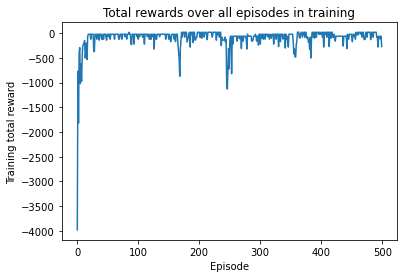

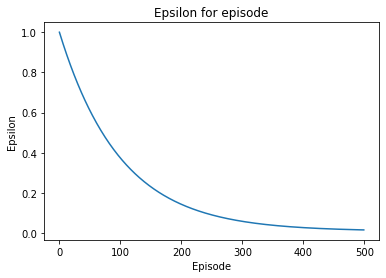

In [35]:
print("Q-LEARNING")
qlearn(False)

SARSA
Failed episode: 0
Total reward for episode 0: -3380
Failed episode: 1
Total reward for episode 1: -950
Failed episode: 2
Total reward for episode 2: -1430
Failed episode: 3
Total reward for episode 3: -490
Failed episode: 4
Total reward for episode 4: -1530
Failed episode: 5
Total reward for episode 5: -480
Failed episode: 6
Total reward for episode 6: -200
Failed episode: 7
Total reward for episode 7: -540
Failed episode: 8
Total reward for episode 8: -1130
Failed episode: 9
Total reward for episode 9: -350
Failed episode: 10
Total reward for episode 10: -450
Failed episode: 11
Total reward for episode 11: -570
Failed episode: 12
Total reward for episode 12: -580
Failed episode: 13
Total reward for episode 13: -140
Failed episode: 14
Total reward for episode 14: -120
Failed episode: 15
Total reward for episode 15: -140
Failed episode: 16
Total reward for episode 16: -20
Failed episode: 17
Total reward for episode 17: -430
Failed episode: 18
Total reward for episode 18: -380
Fail


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 480: 20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 481: 20
Failed episode: 482
Total reward for episode 482: -80

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 483: 20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 484: 20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 485: 20
Failed episode: 486
Total reward for episode 486: -80

    0   1   2   3
  ______

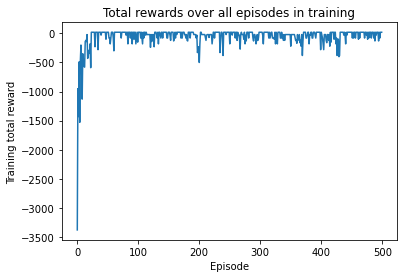

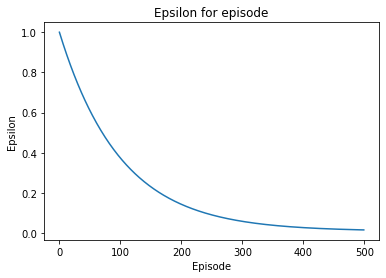

In [36]:
print("SARSA")
qlearn(True)